# Tutoriel sur les fonctions d'affichage

Les tutoriels précédents ont du démontrer l'intérêt d'une librairie de haut niveau pour le stockage et la manipulation de données. Ils ont également montré que nous allions peu à peu nous affranchir (partiellement) du python de base pour travailler principalement dans l'univers numpy.

Mais ces tutoriels montrent aussi la limite des ```print```: au-delà d'une matrice 5x5, on n'est plus capable d'avoir une vision d'ensemble des nombres, des échelles, des ordonnancements... Il va nous falloir introduire de nouveaux outils graphiques pour pallie ces limites.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
# pour avoir toutes les options d'affichage
# %matplotlib notebook
# OU pour un affichage léger et rapide
%matplotlib inline

## Affichage d'une liste de coordonnées
Soit x et y deux vecteurs de même taille $n$:

$x = \begin{pmatrix}
x_1 \\ x_2 \\ \vdots \\ x_n
\end{pmatrix}, \qquad
y = \begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}
$

Chaque couple $(x_i,y_i)$ correspond à un point.

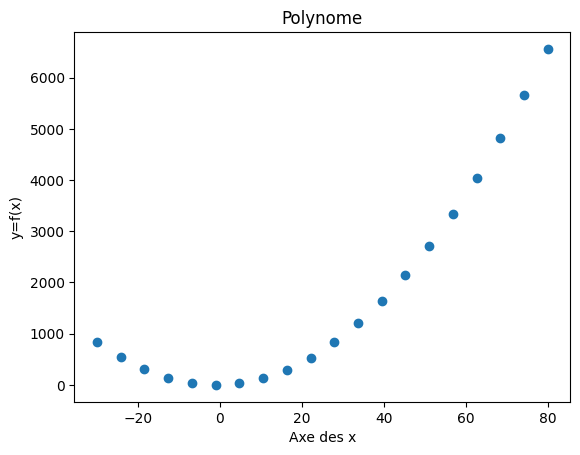

In [3]:
x = np.linspace(-30,80,20) # 20 points entre -30 et 80
y = x*x + 2*x              # la fonction a tracer
                           # y fait des opérations de base sur x 
                           #   => y est de même taille que x

plt.figure()               # creation d'une figure
plt.scatter(x,y)           # affichage d'un nuage de points 
                           # = liste des couples (xi,yi)


# Ajout d'informations (optionel)
plt.title('Polynome')
plt.xlabel('Axe des x')
plt.ylabel('y=f(x)')

plt.show()                 # parfois nécessaire en fonction des options déclarées à l'import


### tracés multiples dans une fenêtre

Il suffit de d'enchainer les appels après la création de la figure. L'example ci-dessous vous montre les avantages et inconvénients de la méthode.

- POSITIF: la syntaxe est très simple, la bibliothèque ```matplotlib``` change de couleur d'affichage entre les appels pour plus de lisibilité.
- NEGATIF: dans l'exemple, le polynome *écrase* la fonction racine

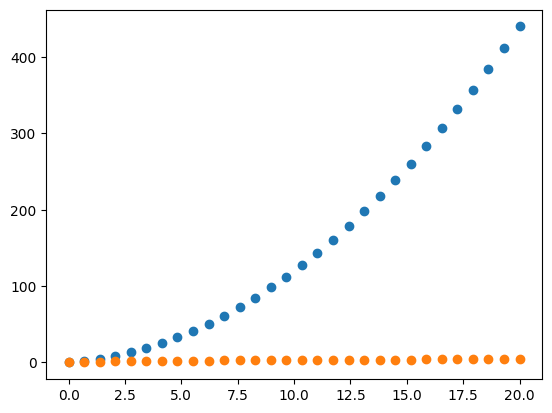

In [4]:
# deux informations à afficher: y1 et y2
x  = np.linspace(0, 20, 30) # 30 points entre 0 et 20
y1 = x*x + 2*x
y2 = np.sqrt(x)

plt.figure()     
plt.scatter(x,y1)
plt.scatter(x,y2)

### fonctions plus avancées

En restant sur la liste de points précédentes $x,y$, il est possible de faire pas mal de choses différentes.

1. On peut passer de ```scatter``` (=nuage de points) à ```plot```(=ligne entre les points)
1. Ajout de légende, de sous fenêtres d'affichage...
1. Maitrise du style (forme du tracé, couleur sous la forme d'un code lettre (r=red, b=blue, ...)

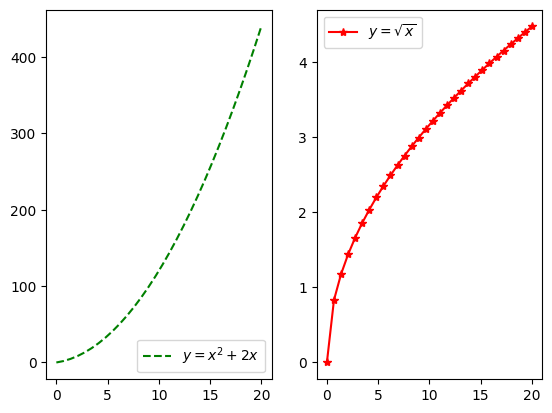

In [19]:
plt.figure()               # creation d'une figure
plt.subplot(1,2,1)         # division de la fenetre en une matrice 1x2 
                           #   + sélection case 1
plt.plot(x,y1,'g--', label='$y = x^2+2x$') # $ pour du code mathématique latex
                          # affichage de la courbe + style + etiquette
plt.legend(loc=4)         # OPTION: localisation de la légende
plt.subplot(1,2,2)
plt.plot(x,y2, 'r*-', label='$y = \sqrt{x}$')
plt.legend(loc=2)          # affichage de la légende en haut a gauche
plt.show()                 # affichage de la fenetre

### Option sur les nuages de points

Il y a des options au niveau du tracé global... Et des options pour faire varier la couleur d'un point à l'autre.

**Note:** toujours pas de code à ajouter, seulement des appels à comprendre.

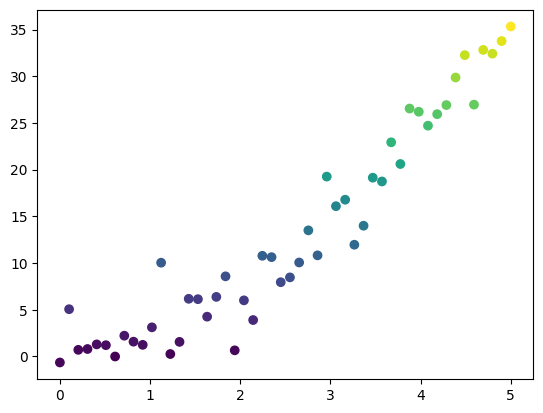

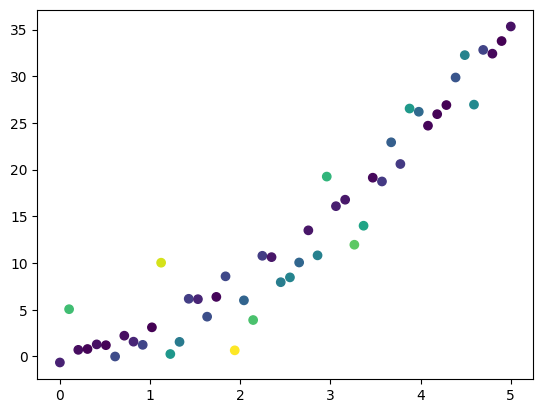

In [20]:
# commande basique = plot + options
x = np.linspace(0,5,50)
y = x*x + 2*x                                      # la fonction a tracer
yb = y + np.random.randn(x.shape[0]) *3            # ajout de bruit

plt.figure()                       # creation d'une figure
plt.scatter(x,yb, c = np.abs(yb )) # jouer avec les couleurs des points du nuage
                                   # couleur = hauteur

plt.figure()                         
plt.scatter(x,yb, c = np.abs(y- yb)) # jouer avec les couleurs des points du nuage
                                     # couleur = niveau de bruit

## Affichage d'une matrice

Dans le cadre du travail avec les librairies numpy et cie, nous manipulons des matrices pas évidentes à explorer. La meilleure solution est souvent de les afficher sous forme d'image.

C'est un outil que l'on utilise beaucoup, il faut être à l'aise avec. Pour ajouter des informations, on recours à la modification des axes (2ème exemple).

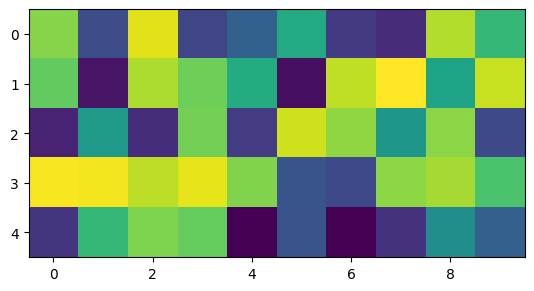

In [22]:
C = np.random.rand(5,10)     # grosse matrice
plt.figure()
plt.imshow(C, interpolation='nearest')                # affichage sour forme d'image
                             # les couleurs correspondent aux valeurs


### Option d'affichage sur ```imshow```

L'option ```colorbar```, pour afficher l'échelle des couleurs utilisées est à ajouter presque tout le temps: il est essentiel de *comprendre* l'affichage

Ajouter des informations sur les axes est complexe mais régulièrement indispensable.


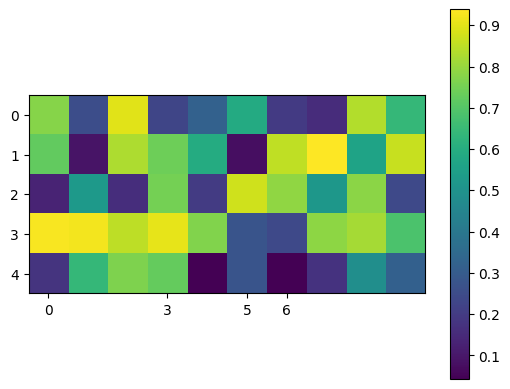

In [36]:
# affichage avancé avec modification des axes

fig, ax = plt.subplots(1,1)                  # pour avoir un pointeur vers les axes
plt.imshow(C, interpolation='nearest')        # meme matrice que ci-dessus
ax.set_xticks(np.arange(C.shape[1]))         # un texte pour chaque colonne
txts = ['Champ 1', 'e2', 'lab 3', 'catégorie 4', 'Champ 5', 'e6', 'lab 7', 'c8', 'c9', 'c10']
ax.set_xticklabels(txts,rotation=60,fontsize=8) # orientation du texte

                             # les couleurs correspondent aux valeurs
plt.colorbar()               # OPTION = legende 
plt.savefig('monfichier.pdf') # sauvegarde de l'image courant (c'est pour ça qu'il n'y a pas d'argument spécifique!)

## Sauvegarde des figures

La sauvegarde des figures est essentielle pour:
- la création de rapport
- l'analyse détaillée de certaines zones qui nécessitent de zoomer plus efficacement que dans une interface jupyter

Dans tous les cas, privilégiez un format de sauvegarde vectoriel qui permet donc des zooms à l'infini et une qualité meilleure dans les rapports

<Figure size 640x480 with 0 Axes>

## Affichage d'histogrammes 

Les histogrammes constituent un outil de base pour l'analyse de données, c'est finalement une des seules manières de *prendre contact* avec des données volumineuses.

Etudions le fonctionnement de la méthode ```bar``` de ```matplotlib```.


[ 8  5 18 10  4 13 17  2  5  9  9 15 10 16  2  8  8 20 12  9 16  1  0  0
  1  7  9 16  8 12 10  9  8  0 13 11 14  0  1  0 11  8 14 14 19  4 14  9
  8  7 17  9 16  1  9  6 18  4  0 14  7  8  5  5 15  1  3 17  4  9 13  9
 17  7 13 11  2 20  6  9  7 14 10 20  4  8 19 17 18  9 10 19  4 17  3 11
 20 12  0 20 12 14  7  8 14  0  9 16 10 14 19 13  9  1 20 18  9  2 13  7
 14  4 11  2  8 15  6 12  8  4  5  2  2  3  5 17 16  5 10  9 18 20 19  6
 14 17 11 11  8  1  0 10  0 11  7 13 11 16  4 19  3 18  1 19 14  0  0  6
  0 16 17 10  2  7 18  3 18 11 14  5 15 13  9  8 11 18 10  2  3  7  4 11
  7  9 14 15 10 10 19  2]


<BarContainer object of 21 artists>

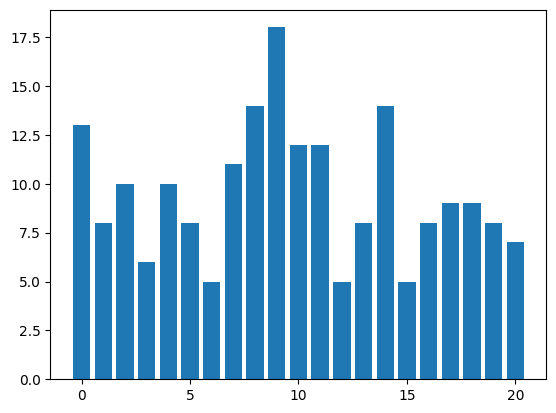

In [37]:
notes = np.random.randint(0,21,200) # génération de 200 valeurs entre 0 et 20
print(notes) # => Pour voir ce qu'il y a dedans... 
              # Mais c'est globalement ininterprétable.

# construction d'un histogramme = comptage des valeurs
histo  = np.zeros(21) # Attention 0 -> 20 = 21 valeurs
for v in notes:
        histo[v] += 1

# affichage avec bar
plt.figure()
axe_x = np.arange(21)   # de 0 à 20 (inclus)
plt.bar(axe_x, histo)   # hauteur des barres pour chaque note

## ... Et d'autres affichages

Comme cette étape de prise en main des données est cruciale, multiplions les variations autour du même thème:
- affichage de la crête de l'histogramme
    - attention à l'échelle des $y$
- regroupement des notes deux par deux

Text(0.5, 1.0, 'Distribution des notes')

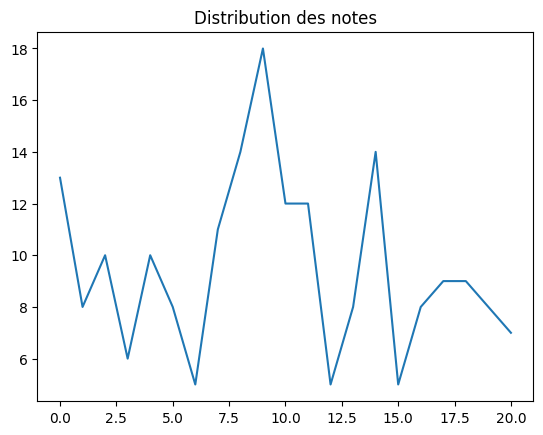

In [38]:
plt.figure()
plt.plot(axe_x, histo)
plt.title("Distribution des notes") # vous noterez l'effet d'optique lié 
                                    # au resserrement de l'échelle y


Text(0.5, 1.0, 'Distribution des notes')

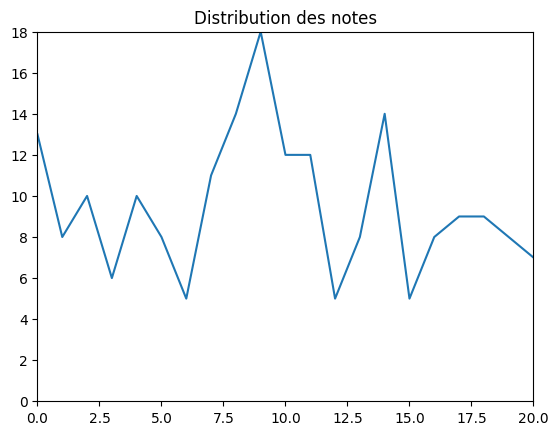

In [39]:
plt.figure()
plt.plot(axe_x, histo)
plt.axis([0, 20, 0, histo.max() ]) # forcer les axes sur la plage de valeurs voulues
plt.title("Distribution des notes") 

### Histogramme customisé

**Difficulté 1:** refaire le comptage en comptant par intervalle
- 11 catégories [0,2[,[2,4[, ...
- compter combien il y a de notes dans chaque catégorie
- Astuce: la note $x$ doit être comptabilisée dans la catégorie $x/2$... A condition d'arrondir (il n'y a pas d'indice réel).

**Difficulté 2:** l'affichage n'est pas optimal, les barres ne sont pas assez larges. Nous allons étudier la documentation de la fonction ```bar```:
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

Il est possible de changer la largeur des barres pour chaque barre... Mais nous gardons ça pour les exercices.

<BarContainer object of 11 artists>

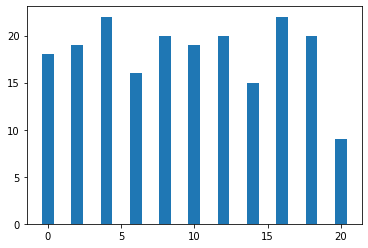

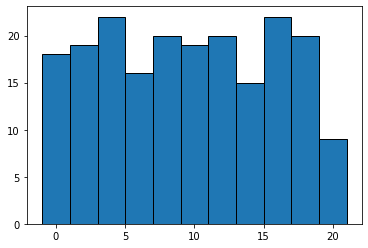

In [17]:
# construction d'un second histogramme = comptage des valeurs 2 par 2
histo2  = np.zeros(11)    # 11 catégories [0,2[,[2,4[, ... 
for v in notes:
        histo2[v//2] += 1 # astuce: la note x doit être comptée dans la case d'indice x/2
                          # difficulté de l'astuce: il faut arrondir les indices = division entière

# affichage avec bar
plt.figure()
axe_x2 = np.arange(0,21,2)   # de 0 à 20 (inclus)
plt.bar(axe_x2, histo2)      # hauteur des barres pour chaque note

# affichage avec bar en gérant la largeur!
plt.figure()
axe_x2 = np.arange(0,21,2)   # de 0 à 20 (inclus)
plt.bar(axe_x2, histo2, width=2, edgecolor='k')      # hauteur des barres pour chaque note


## bar *vs* histogramme

Vous distinguerez bien les méthodes ```bar``` et ```plt.hist``` ou ```np.histogram```:
- ```bar``` est une simple méthode d'affichage où vous devez donner les absisses et les hauteurs des barres associées.
- ```hist``` est une méthode avancée qui calcule l'histogramme en plus de l'afficher
    - c'est sur cette méthode que vous aller tomber dès que vous chercherez de la documentation sur internet...
    - ... mais nous ne souhaitons pas utiliser cette méthode (au moins dans un premier temps) afin de bien comprendre le fonctionnement des histogrammes.

Dans l'exemple précédent, les notes étaient stockées dans ```notes```:
- pour utiliser ```bar```, nous avons du calculer ```histo``` à la main
- vous pouvez utiliser ```plt.hist``` en vous servant de la documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
    - cette fonction travaillera directement sur la variable ```notes``` (la définition des catégories et les comptages sont intégrés à la méthode).


(array([10.,  8., 10.,  9., 12., 10., 11.,  5.,  7., 13.,  9., 10., 13.,
         7.,  8.,  7.,  9., 13., 11., 18.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 <BarContainer object of 20 artists>)

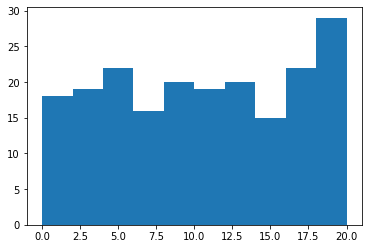

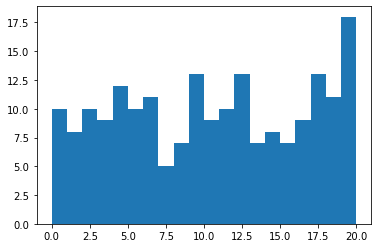

In [18]:
plt.figure()
plt.hist(notes, bins=10) # jouer avec le nombre d'intervalles est important!

plt.figure()
plt.hist(notes, bins=20)

## Sélection des points à afficher

Combinaison d'usage entre les fonctions de recherche et les fonctions d'affichage

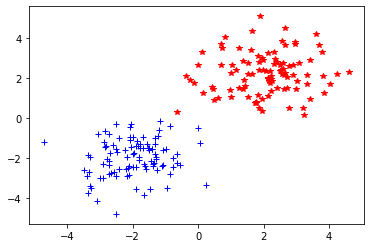

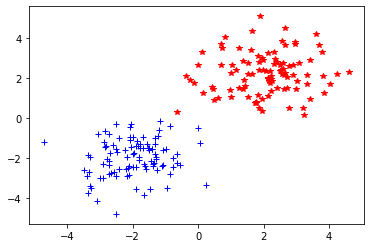

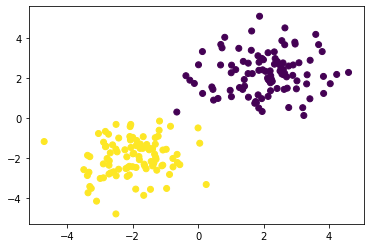

In [19]:
# génération des points de la classe 1 & 2
N=100
x = np.vstack((np.random.randn(N,2)+2,np.random.randn(N,2)-2)) # données gaussiennes 2D
y = np.ones(2*N) # étiquettes
y[:N] = -1

# comment afficher chaque classe d'une couleur???

# solution 1
ind1 = np.where(y==1) 
ind2 = np.where(y==-1)
plt.figure()
plt.plot(x[ind1, 0],x[ind1, 1], 'b+') # aff en croix bleues
plt.plot(x[ind2, 0],x[ind2, 1], 'r*') # aff en étoiles rouges
plt.show()

# solution 2: version en syntaxe rapide
plt.figure()
plt.plot(x[y==1, 0],x[y==1, 1], 'b+') # aff en croix bleues
plt.plot(x[y==-1, 0],x[y==-1, 1], 'r*') # aff en étoiles rouges

# solution 3: version scatter: le code couleur peut etre un chiffre dans scatter!
plt.figure()
plt.scatter(x[:,0], x[:,1], c=y)

# Exercice d'application

## Affichage sur des données INSEE sur le salaire en fonction du diplôme et du sexe

Données brutes disponibles : http://www.insee.fr/
Données mises en forme: http://mapsi.lip6.fr/uploads/Main/salaire2010INSEE.csv

**Correspondances des lignes:**
 - Aucun ou Certificat d’études primaires
 - Brevet des collèges
 - CAP ou BEP
 - Baccalauréat
 - IUT, BTS, diplôme de 1er cycle universitaire (DEUG, L1, L2) ou diplôme équivalent
 - Diplôme supérieur à Baccalauréat +2
 - Diplôme de 2ème ou 3ème cycle universitaire
 - Diplôme d'une grande école (ingénieur, commerce)
 
**Correspondances des colonnes:**
 - Moyenne des heures travaillées
 - Salaire horaire
Les 2 colonnes sont répétées 3 fois: Ensemble de la population / Femmes / Homme

Code de chargement des données:
```python
import numpy as np
data = np.loadtxt("dataSalaire.csv", delimiter=';')
```

## Questions

A l'aide de la méthode scatter, tracer les salaires moyens en fonction des diplômes pour:
 - L'ensemble de la population (en vert)
 - Les femmes (en rose -n'ayons pas peur des clichés-)
 - Les hommes (en bleu)
 
Ajouter des titres sur les axes (xlabel, ylabel)
Modifier l'axe des x pour afficher le diplôme avec le vecteur de textes suivant:
```python
diplomes = ["Aucun", "BEPC", "CAP/BEP", "Bac", "IUT, BTS, DEUG", ">Bac+2", "Master/Phd", "Ecole Ing/com"]
```


## Histogramme amélioré

L'objectif de cet exercice est de construire un histogramme très spécifique sur les données suivantes:
- regrouper toutes les notes $<5$
- regrouper les notes entre 5 et 8 inclus
- regrouper les notes suivantes 2 par 2 entre 8 et 16
- puis 1 par 1 au dessus.
Faire l'affichage avec la commmande ```bar``` de matplotlib

In [ ]:
# génération de notes => Arbitraire, pas besoin de comprendre le processus de génération
N= 100
notes = np.maximum(np.minimum(np.round(np.random.randn(N)*4+9,1),20),0)

print(notes)

# faire les affichages demandés

## Scatter plot et code couleur

Soit des données 2D (aléatoires)... Nous allons essayer de les colorer pour leur donner du sens

1. Afficher un scatter plot où tous les points sont bleus
1. Afficher un scatter plot où tous les points sont bleus 
    1. sauf ceux dont l'absisse est supérieure à 0.75 (à afficher en rouge)
1. Afficher un scatter plot dont la couleur est *proportionnelle* à l'axe des ordonnées
1. Afficher un scatter plot dont la couleur est *proportionnelle* à l'axe des ordonnées ET dont le rayon est proportionnel à l'axe des absisses

** Documentation: ** https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

In [ ]:
X = np.random.rand(100,2)

print(X)

# faire les affichages
